In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import pickle
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('D:/ds/Attrition IBM.csv')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [3]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [4]:
df.shape

(1470, 35)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [6]:
df.skew()

Age                         0.413286
DailyRate                  -0.003519
DistanceFromHome            0.958118
Education                  -0.289681
EmployeeCount               0.000000
EmployeeNumber              0.016574
EnvironmentSatisfaction    -0.321654
HourlyRate                 -0.032311
JobInvolvement             -0.498419
JobLevel                    1.025401
JobSatisfaction            -0.329672
MonthlyIncome               1.369817
MonthlyRate                 0.018578
NumCompaniesWorked          1.026471
PercentSalaryHike           0.821128
PerformanceRating           1.921883
RelationshipSatisfaction   -0.302828
StandardHours               0.000000
StockOptionLevel            0.968980
TotalWorkingYears           1.117172
TrainingTimesLastYear       0.553124
WorkLifeBalance            -0.552480
YearsAtCompany              1.764529
YearsInCurrentRole          0.917363
YearsSinceLastPromotion     1.984290
YearsWithCurrManager        0.833451
dtype: float64

The database has 1470 rows and 35 columns.

Factors like EmployeeCount, Employee number are irrelevant to the model - nominal data. Standard Hours also is irrelevant as it is fixed for all workers. All this data will be removed.

Of the remaining 32 columns, 18 are Categorical values: Attrition, StockOptionLevel, JobInvolvement, JobLevel, JobSatisfaction, PerformanceRating, EnvironmentSatisfaction, RelationshipSatisfaction, Education, EducationField, Department, Gender, JobRole, MaritalStatus, Over18, OverTime, WorkLifeBalance and BusinessTravel (some are objects which need to be converted using encoders). 14 are continuous.

There are no null values. 0 as entry values in columns are valid as they can be 0 - it is not null. 

Skew is observed in continuous columns of Distance from home,  Monthly income, Number of companies worked, PercentSalaryHike,  TotalWorkingYears, YearsAtCompany, YearsInCurrentRole, YearsSinceLastPromotion and YearsWithCurrManager - skew needs to be removed. 

In [7]:
df = df.drop(['EmployeeCount', 'EmployeeNumber', 'StandardHours'], axis = 1)

In [8]:
from sklearn.preprocessing import LabelEncoder
lenc = LabelEncoder()
for i in df:
    if df[i].dtypes != 'int64':
        s1 = lenc.fit_transform(df[i])
        s1 = pd.DataFrame(s1)
        df[i] = s1
    else:
        continue
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,2,0,...,3,1,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,3,1,...,4,4,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,4,1,...,3,2,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,4,0,...,3,3,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,1,...,3,4,1,6,3,3,2,2,2,2


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Age                       1470 non-null   int64
 1   Attrition                 1470 non-null   int32
 2   BusinessTravel            1470 non-null   int32
 3   DailyRate                 1470 non-null   int64
 4   Department                1470 non-null   int32
 5   DistanceFromHome          1470 non-null   int64
 6   Education                 1470 non-null   int64
 7   EducationField            1470 non-null   int32
 8   EnvironmentSatisfaction   1470 non-null   int64
 9   Gender                    1470 non-null   int32
 10  HourlyRate                1470 non-null   int64
 11  JobInvolvement            1470 non-null   int64
 12  JobLevel                  1470 non-null   int64
 13  JobRole                   1470 non-null   int32
 14  JobSatisfaction           1470 non-null 

All data has been converted to usable number format. Checking for outliers and removing them

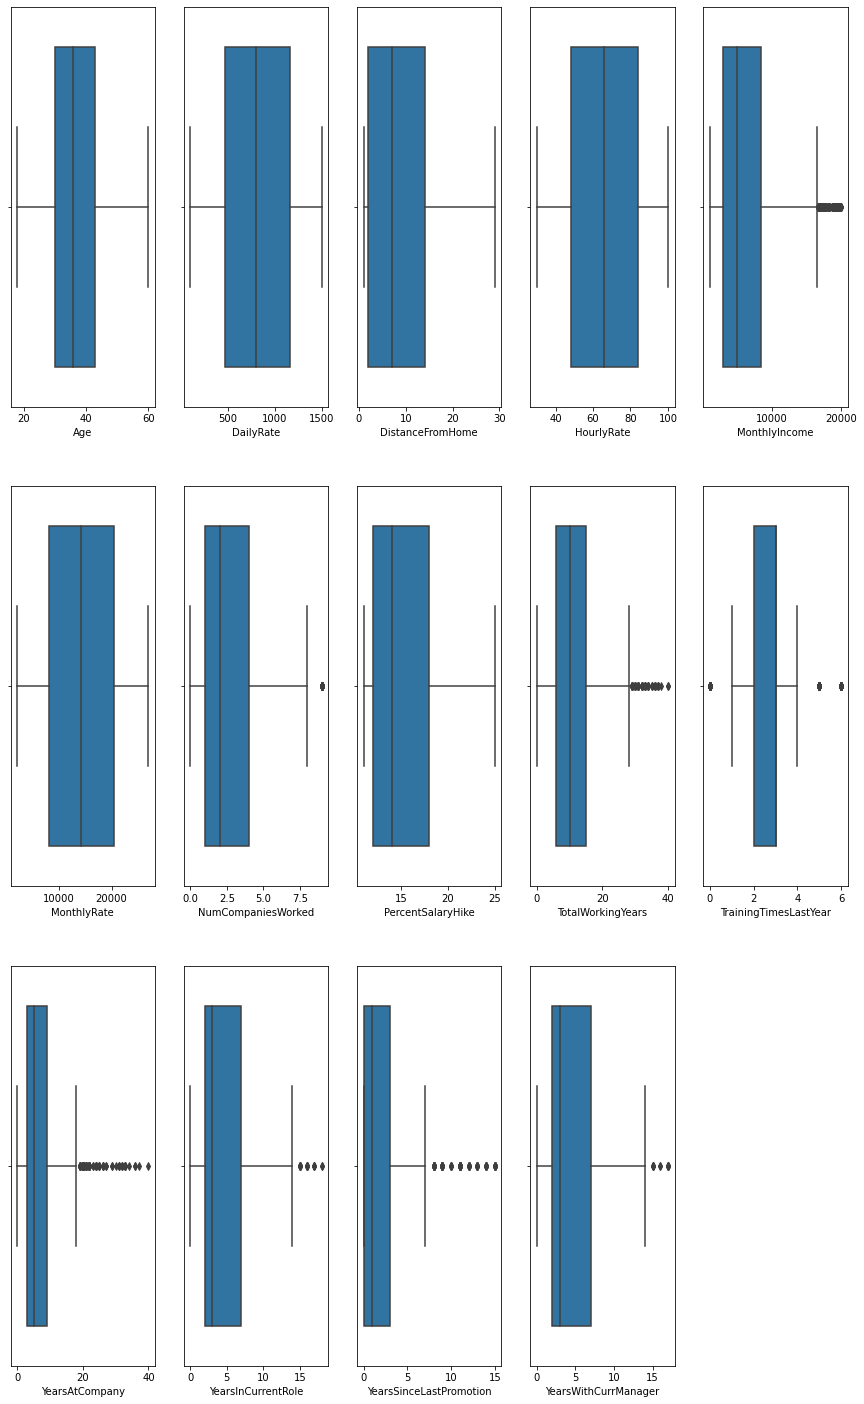

In [23]:
df1 = df.drop(['Attrition', 'StockOptionLevel', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'PerformanceRating', 
               'EnvironmentSatisfaction', 'RelationshipSatisfaction', 'Education', 'EducationField', 'Department', 'Gender', 
               'JobRole', 'MaritalStatus', 'Over18', 'OverTime', 'WorkLifeBalance', 'BusinessTravel'], axis=1)
plt.figure(figsize=(15,25))
gr = 1
for c in df1:
    ax = plt.subplot(3, 5, gr)
    sns.boxplot(df1[c])
    plt.xlabel(c, fontsize = 10)
    gr+=1
plt.show()

There are outliers in MonthlyIncome, TotalWorkingYears, NumCompaniesWorked, TrainingTimesLastYear, YearsAtCompany, YearsInCurrentRole, YearsSinceLastPromotion and YearsWithCurrManager. We will remove them using z-score as removing data through quartiles will lead to a lot of loss of data

In [109]:
from scipy.stats import zscore
z=np.abs(zscore(df.drop(['Attrition', 'StockOptionLevel', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'PerformanceRating', 
               'EnvironmentSatisfaction', 'RelationshipSatisfaction', 'Education', 'EducationField', 'Department', 'Gender', 
               'JobRole', 'MaritalStatus', 'Over18', 'OverTime', 'WorkLifeBalance', 'BusinessTravel'], axis=1)))
dfn=df[(z<3).all(axis=1)]
dfn.shape

(1387, 32)

Less than 6% data is lost which is acceptable

In [110]:
df2 = dfn.drop(['Attrition', 'StockOptionLevel', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'PerformanceRating', 
               'EnvironmentSatisfaction', 'RelationshipSatisfaction', 'Education', 'EducationField', 'Department', 'Gender', 
               'JobRole', 'MaritalStatus', 'Over18', 'OverTime', 'WorkLifeBalance', 'BusinessTravel'], axis=1)
df2.skew()

Age                        0.472280
DailyRate                 -0.017078
DistanceFromHome           0.954752
HourlyRate                -0.030481
MonthlyIncome              1.544770
MonthlyRate                0.030596
NumCompaniesWorked         1.037715
PercentSalaryHike          0.800592
TotalWorkingYears          1.034487
TrainingTimesLastYear      0.577614
YearsAtCompany             1.248623
YearsInCurrentRole         0.726675
YearsSinceLastPromotion    1.756335
YearsWithCurrManager       0.694506
dtype: float64

Skew still remains. Applying yeo Johnson

In [95]:
from sklearn.preprocessing import PowerTransformer
power = PowerTransformer(method='yeo-johnson', standardize=True)
dfn1 = power.fit_transform(dfn.drop(['Attrition', 'StockOptionLevel', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'PerformanceRating', 
                   'EnvironmentSatisfaction', 'RelationshipSatisfaction', 'Education', 'EducationField', 'Department', 'Gender', 
                   'JobRole', 'MaritalStatus', 'Over18', 'OverTime', 'WorkLifeBalance', 'BusinessTravel'], axis=1))
dfn1 = pd.DataFrame(dfn1)
dfn1.columns = dfn.drop(['Attrition', 'StockOptionLevel', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'PerformanceRating', 
                   'EnvironmentSatisfaction', 'RelationshipSatisfaction', 'Education', 'EducationField', 'Department', 'Gender', 
                   'JobRole', 'MaritalStatus', 'Over18', 'OverTime', 'WorkLifeBalance', 'BusinessTravel'], axis=1).columns
dfn.index = dfn1.index
dfn1.head()

,Age,DailyRate,DistanceFromHome,HourlyRate,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.610133,0.750615,-1.489968,1.359498,0.386674,0.755974,1.620671,-1.495549,-0.173231,-2.608524,0.231837,0.290524,-1.073534,0.582177
1,1.371830,-1.343372,0.244561,-0.208763,0.144235,1.410991,-0.561880,1.690425,0.147620,0.217074,0.948319,1.006575,0.193168,1.018073
2,0.182486,1.337080,-1.028366,1.267832,-1.431153,-1.910035,1.273711,0.193797,-0.351153,0.217074,-2.156089,-1.571814,-1.073534,-1.528426
3,-0.284736,1.377080,-0.698191,-0.458919,-0.814425,1.205093,-0.561880,-1.495549,-0.173231,0.217074,0.621429,1.006575,1.027520,-1.528426
4,-1.080489,-0.467301,-1.028366,-1.290538,-0.504453,0.391227,1.764103,-0.957525,-0.544046,0.217074,-0.933983,-0.390769,0.722874,-0.347871


In [96]:
for i in dfn1:
    dfn[i] = dfn1[i]
    
dfn.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.610133,1,2,0.750615,2,-1.489968,2,1,2,0,...,3,1,0,-0.173231,-2.608524,1,0.231837,0.290524,-1.073534,0.582177
1,1.371830,0,1,-1.343372,1,0.244561,1,1,3,1,...,4,4,1,0.147620,0.217074,3,0.948319,1.006575,0.193168,1.018073
2,0.182486,1,2,1.337080,1,-1.028366,2,4,4,1,...,3,2,0,-0.351153,0.217074,3,-2.156089,-1.571814,-1.073534,-1.528426
3,-0.284736,0,1,1.377080,1,-0.698191,4,1,4,0,...,3,3,0,-0.173231,0.217074,3,0.621429,1.006575,1.027520,-1.528426
4,-1.080489,0,2,-0.467301,1,-1.028366,1,3,1,1,...,3,4,1,-0.544046,0.217074,3,-0.933983,-0.390769,0.722874,-0.347871


In [111]:
dfn.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,2,0,...,3,1,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,3,1,...,4,4,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,4,1,...,3,2,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,4,0,...,3,3,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,1,...,3,4,1,6,3,3,2,2,2,2


In [97]:
dfn.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

In [98]:
dfn.drop(['Attrition', 'StockOptionLevel', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'PerformanceRating', 
                   'EnvironmentSatisfaction', 'RelationshipSatisfaction', 'Education', 'EducationField', 'Department', 'Gender', 
                   'JobRole', 'MaritalStatus', 'Over18', 'OverTime', 'WorkLifeBalance', 'BusinessTravel'], axis=1).skew()

Age                       -0.004079
DailyRate                 -0.199742
DistanceFromHome          -0.008149
HourlyRate                -0.105678
MonthlyIncome              0.027700
MonthlyRate               -0.176560
NumCompaniesWorked         0.016175
PercentSalaryHike          0.112128
TotalWorkingYears         -0.009666
TrainingTimesLastYear      0.057949
YearsAtCompany            -0.025230
YearsInCurrentRole        -0.069631
YearsSinceLastPromotion    0.212301
YearsWithCurrManager      -0.070570
dtype: float64

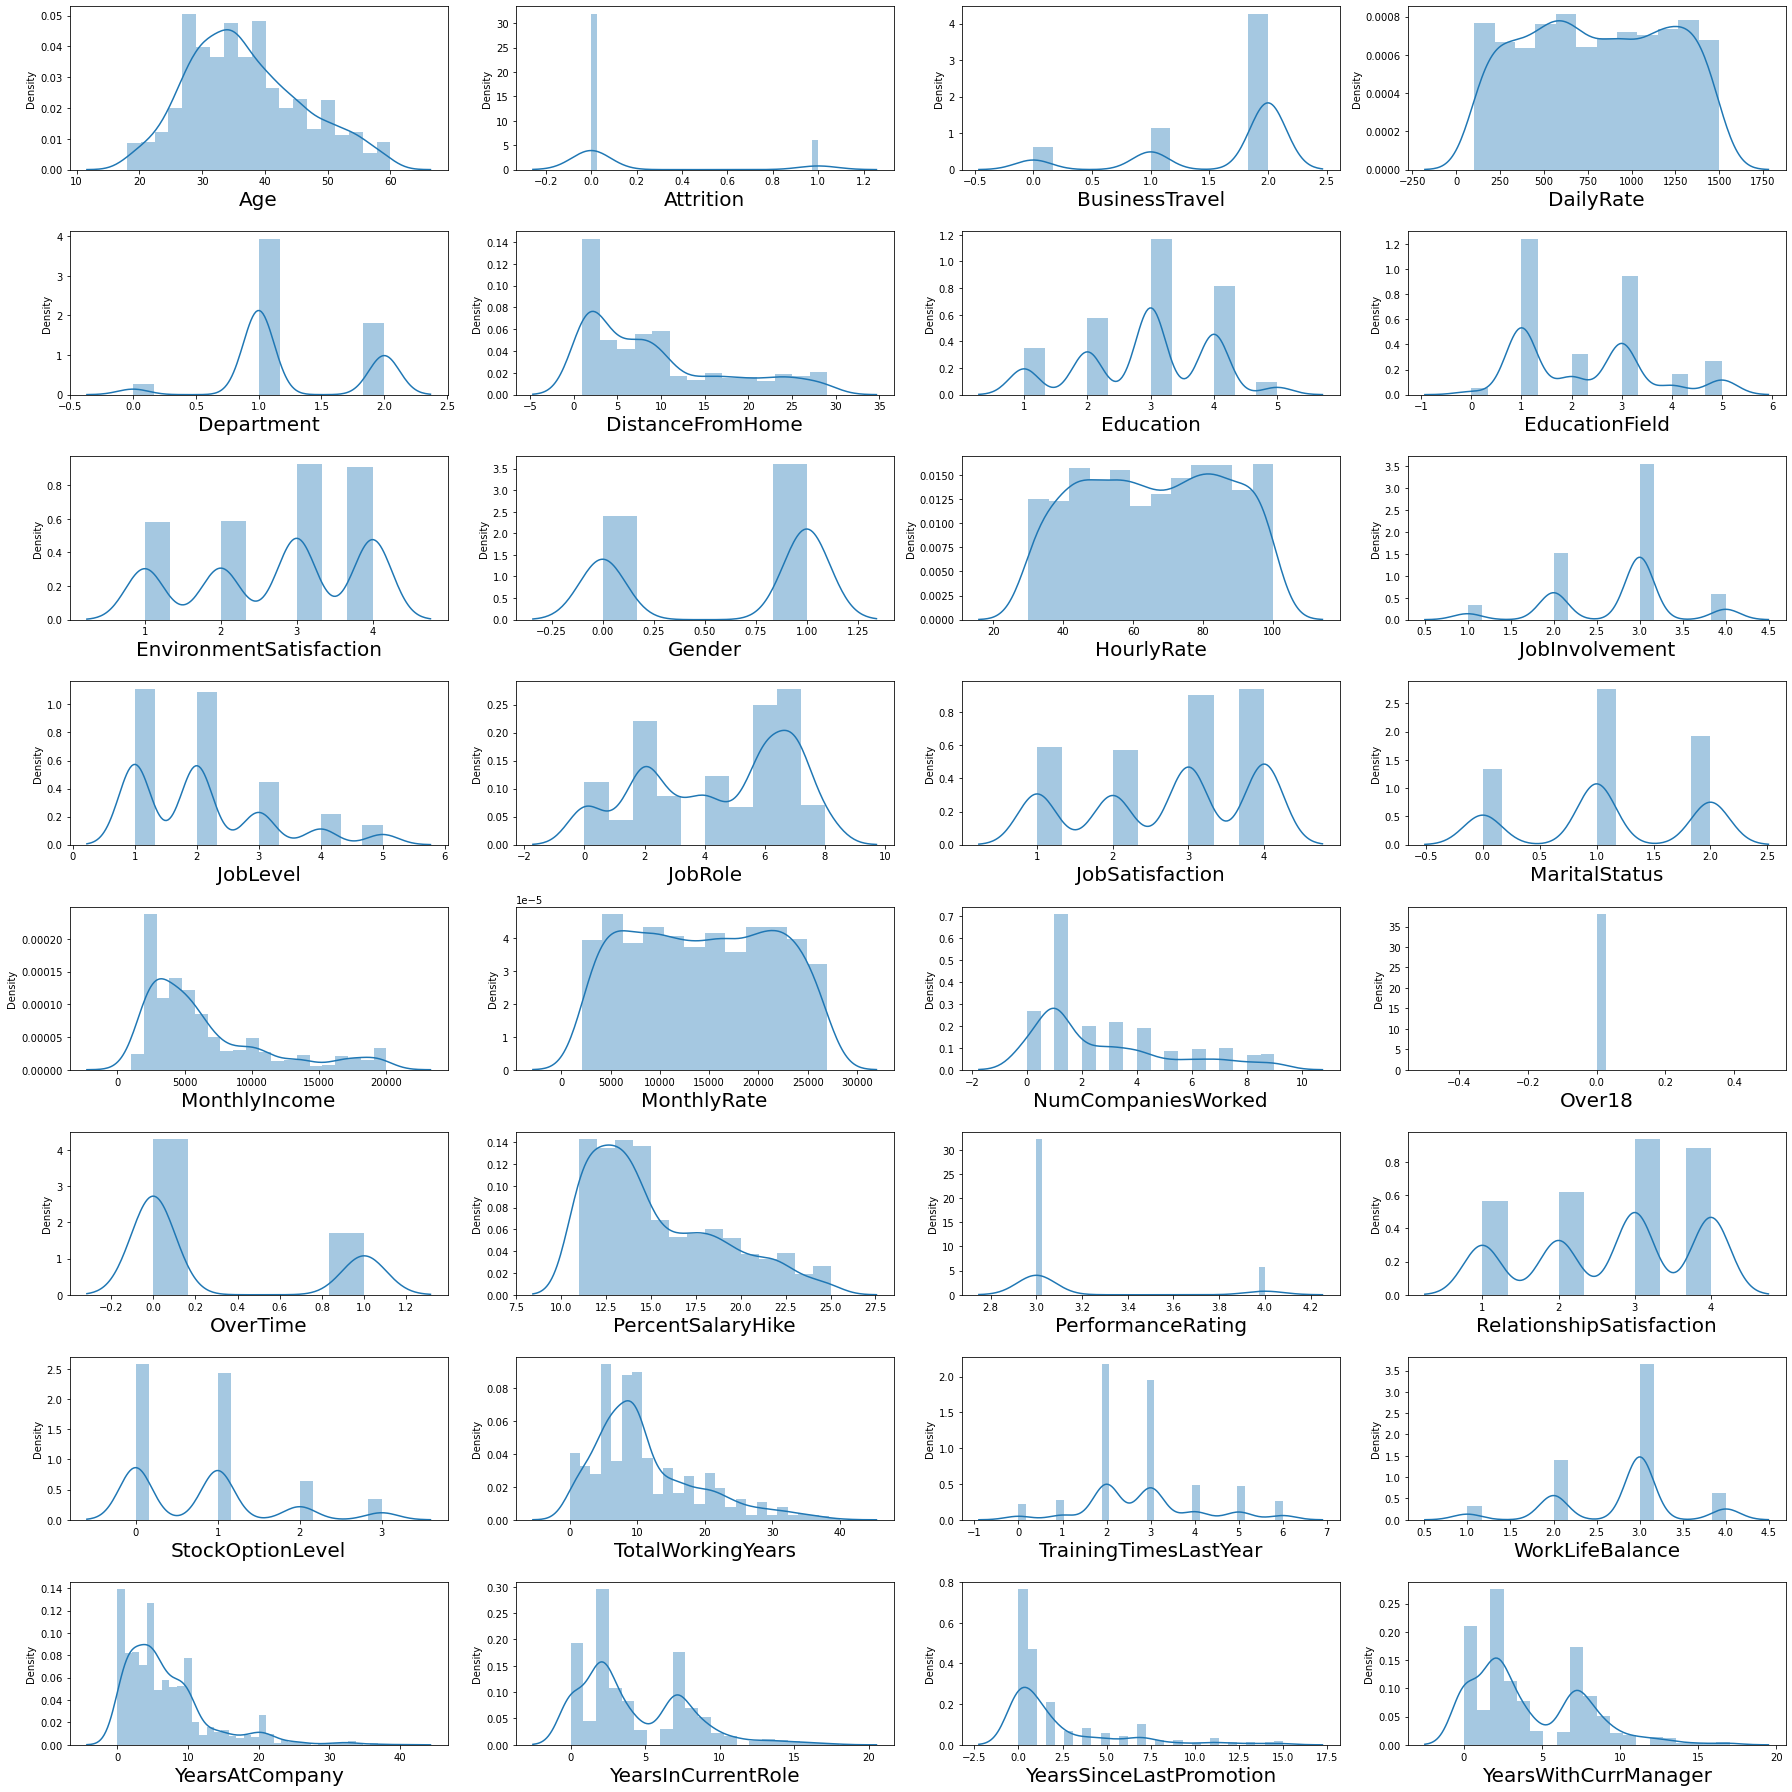

In [99]:
plt.figure(figsize=(25,25))
plotnumber = 1
for c in dfn:
    ax= plt.subplot(8,4,plotnumber)
    sns.distplot(df[c])  
    plt.xlabel(c,fontsize=20) 
    plotnumber+=1
plt.tight_layout()

Skewness is reduced and continuous data is approaching normal distribution.

In [102]:
dfn['Attrition'].value_counts()

0    1158
1     229
Name: Attrition, dtype: int64

The data is imbalanced. We need to balance the data when we analyse

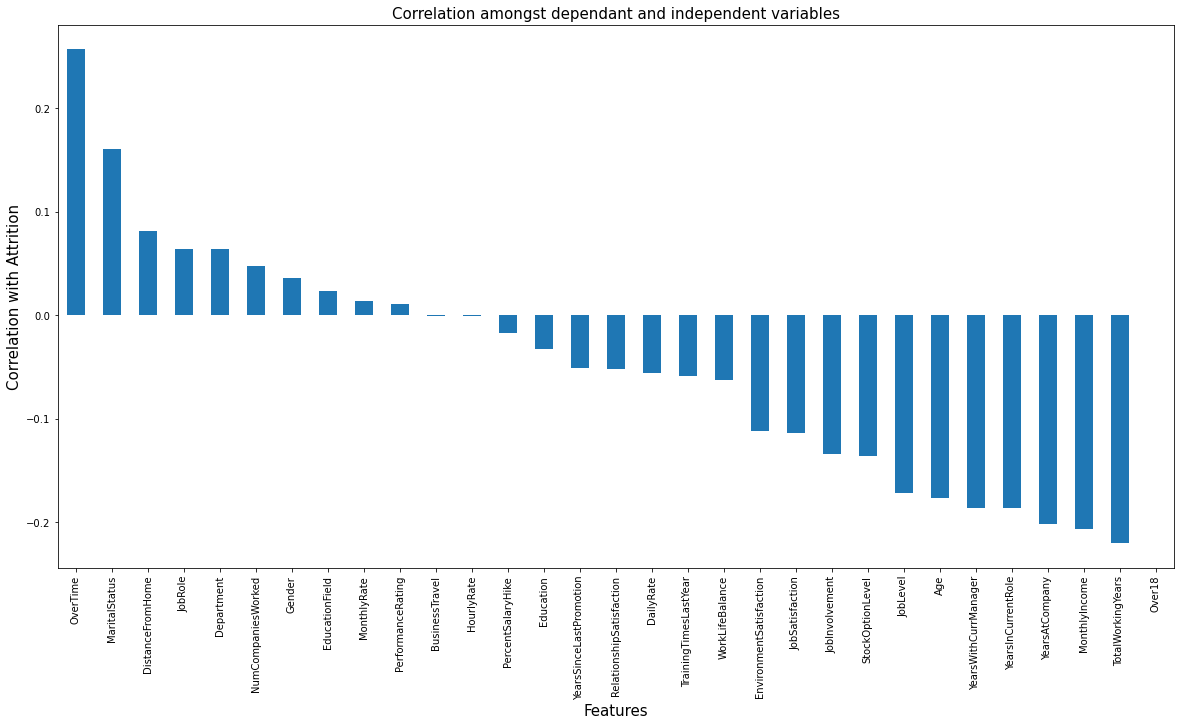

In [106]:
df3 = dfn.corr()
plt.figure(figsize=(20,10))
df3['Attrition'].sort_values(ascending=False).drop('Attrition').plot(kind='bar')
plt.xlabel('Features', fontsize = 15)
plt.ylabel('Correlation with Attrition', fontsize = 15)
plt.title('Correlation amongst dependant and independent variables', fontsize = 15)
plt.show()

There is low dependance with factors like Business Travel, Hourly rate, Percent Salary Increase, Performance Rating, Monthly rate, Education and Education Field

As all are over 18, removing the column

In [116]:
dfn = dfn.drop('Over18', axis = 1)

In [117]:
X = dfn.drop('Attrition', axis=1)
y = dfn['Attrition']

In [118]:
vif1 = pd.DataFrame()
Xsc = np.asarray(X)
vif1['score'] = [variance_inflation_factor(Xsc,i) for i in range (Xsc.shape[1])]
vif1['Feature'] = X.columns
vif1

,score,Feature
0,30.937930,Age
1,6.667388,BusinessTravel
2,5.041042,DailyRate
3,13.849252,Department
4,2.320873,DistanceFromHome
5,9.339536,Education
6,3.889948,EducationField
7,7.188979,EnvironmentSatisfaction
8,2.531225,Gender
9,11.302474,HourlyRate


multicollinearity exists between many factors. We shall remove some factors upon analysis

In [115]:
from sklearn.feature_selection import SelectKBest, f_classif
bf= SelectKBest(score_func = f_classif, k='all')
fit = bf.fit(X,y)
df_scores=pd.DataFrame(fit.scores_)
df_columns=pd.DataFrame(X.columns)

#concatenate dataframes
feature_scores = pd.concat([df_columns, df_scores], axis=1)
feature_scores.columns = ['Feature name', 'Score']
print(feature_scores.nlargest(31,'Score'))

                Feature name      Score
19                  OverTime  98.140453
24         TotalWorkingYears  49.422063
11                  JobLevel  42.206842
28        YearsInCurrentRole  41.726267
27            YearsAtCompany  39.467993
30      YearsWithCurrManager  37.468266
15             MonthlyIncome  37.255699
14             MaritalStatus  36.836958
0                        Age  36.092149
23          StockOptionLevel  26.364601
10            JobInvolvement  25.307350
13           JobSatisfaction  18.303387
7    EnvironmentSatisfaction  17.719366
4           DistanceFromHome   9.327110
12                   JobRole   5.747073
3                 Department   5.631654
26           WorkLifeBalance   5.429960
25     TrainingTimesLastYear   4.559904
2                  DailyRate   4.549637
22  RelationshipSatisfaction   3.805168
17        NumCompaniesWorked   3.514981
8                     Gender   1.822547
5                  Education   1.482792
29   YearsSinceLastPromotion   1.187027


In [123]:
X1 = X.drop(['BusinessTravel', 'HourlyRate', 'PercentSalaryHike', 'PerformanceRating', 'MonthlyRate', 'EducationField', 
            'YearsSinceLastPromotion', 'Education', 'Gender', 'NumCompaniesWorked', 'RelationshipSatisfaction', 'DailyRate',
            'TrainingTimesLastYear', 'WorkLifeBalance', 'Department', 'JobRole'], axis = 1)

In [125]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y, test_size = 0.25, random_state = 2, shuffle = True, stratify = y)

In [126]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 2, shuffle = True, stratify = y)

In [127]:
!pip install imblearn
!pip install delayed 
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 42)
X_train_new, y_train_new = sm.fit_sample(X_train, y_train)

In [128]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
lreg = LogisticRegression()
rfc = RandomForestClassifier()
sv = SVC()
from sklearn.model_selection import cross_val_score
dtc.fit(X_train_new, y_train_new)
lreg.fit(X_train_new, y_train_new)
rfc.fit(X_train_new, y_train_new)
sv.fit(X_train_new, y_train_new)
print(dtc.score(X_test,y_test), lreg.score(X_test,y_test), rfc.score(X_test,y_test), sv.score(X_test,y_test))

0.7319884726224783 0.6512968299711815 0.8213256484149856 0.5273775216138329


Random Forest classifier is the best output model. Removing the low k score data and trying to increase the accuracy

In [129]:
X1_train_new, y1_train_new = sm.fit_sample(X1_train, y1_train)
dtc.fit(X1_train_new, y1_train_new)
lreg.fit(X1_train_new, y1_train_new)
rfc.fit(X1_train_new, y1_train_new)
sv.fit(X1_train_new, y1_train_new)
print(dtc.score(X1_test,y1_test), lreg.score(X1_test,y1_test), rfc.score(X1_test,y1_test), sv.score(X1_test,y1_test))

0.7492795389048992 0.7262247838616714 0.8328530259365994 0.6512968299711815


The accuracy has increased slightly, but not much

In [130]:
print(cross_val_score(dtc, X1, y, cv=5).mean())
print(cross_val_score(rfc, X1, y, cv=5).mean())
print(cross_val_score(sv, X1, y, cv=5).mean())
print(cross_val_score(lreg, X1, y, cv=5).mean())

0.7692751214191103
0.8557904578863985
0.8348959821312626
0.8442770693192738


Random Forest is the best model as it enjoys least difference of actual and CV score. Performing HPT on Random Forest Model

In [137]:
from sklearn.model_selection import GridSearchCV
params = {'n_estimators': [9, 11 ,13, 15, 17, 19, 21, 23, 25], 
         'criterion' : ['entropy', 'gini'],
         'max_depth' : [9, 11 ,13, 15, 17, 19],
         'min_samples_split': [8,9,10,11],
         'min_samples_leaf': [4,5,6]}
grd = GridSearchCV(rfc, param_grid = params)
grd.fit(X1_train_new, y1_train_new)
print(grd.best_params_)

{'criterion': 'entropy', 'max_depth': 11, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 23}


In [138]:
rfc = grd.best_estimator_
rfc.fit(X1_train_new, y1_train_new)

RandomForestClassifier(criterion='entropy', max_depth=11, min_samples_leaf=4,
                       min_samples_split=10, n_estimators=23)

In [139]:
rfc.score(X1_test,y1_test)

0.792507204610951

Upon cross validation, the accuracy reduced, but not much

In [140]:
#Saving file
import joblib
joblib.dump(rfc, 'HRAttrition.pkl')

['HRAttrition.pkl']